# Decision Trees
**This notebook will walk through some of the basics of Decision Tree Algorithm.**



# **Pankaj Dubey**

# Import all the libraries

In [34]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

**Loading the Iris dataset from sklearn library**

In [36]:
# Forming the iris dataframe
df=pd.read_csv('/home/pankaj/Documents/code/task3grip/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
y = df['Species']
df.drop('Id',axis = 1,inplace=True)

In [51]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# EDA on the Classification on Iris dataset

In [52]:
# Shape of the data
print(f'The shape of the dataframe is: {df.shape}')
print(f'The shape of the y target is: {y.shape}')

The shape of the dataframe is: (150, 5)
The shape of the y target is: (150,)


In [53]:
# Describe of dataframe
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<IPython.core.display.Javascript object>


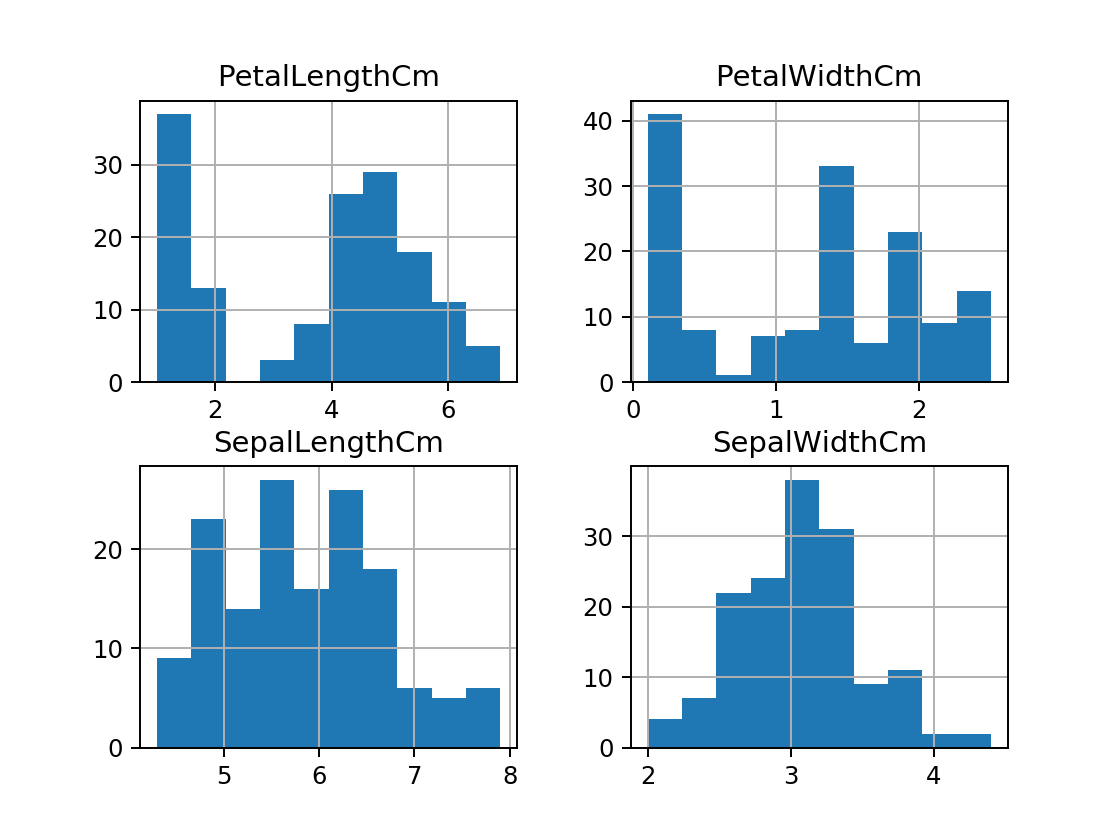

In [55]:
df.hist()
plt.show()

In [56]:
# value counts of target variable 
df.groupby(df['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


**As we can see above all the target are of same size**

In [57]:
df.groupby(df['Species']).size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<IPython.core.display.Javascript object>


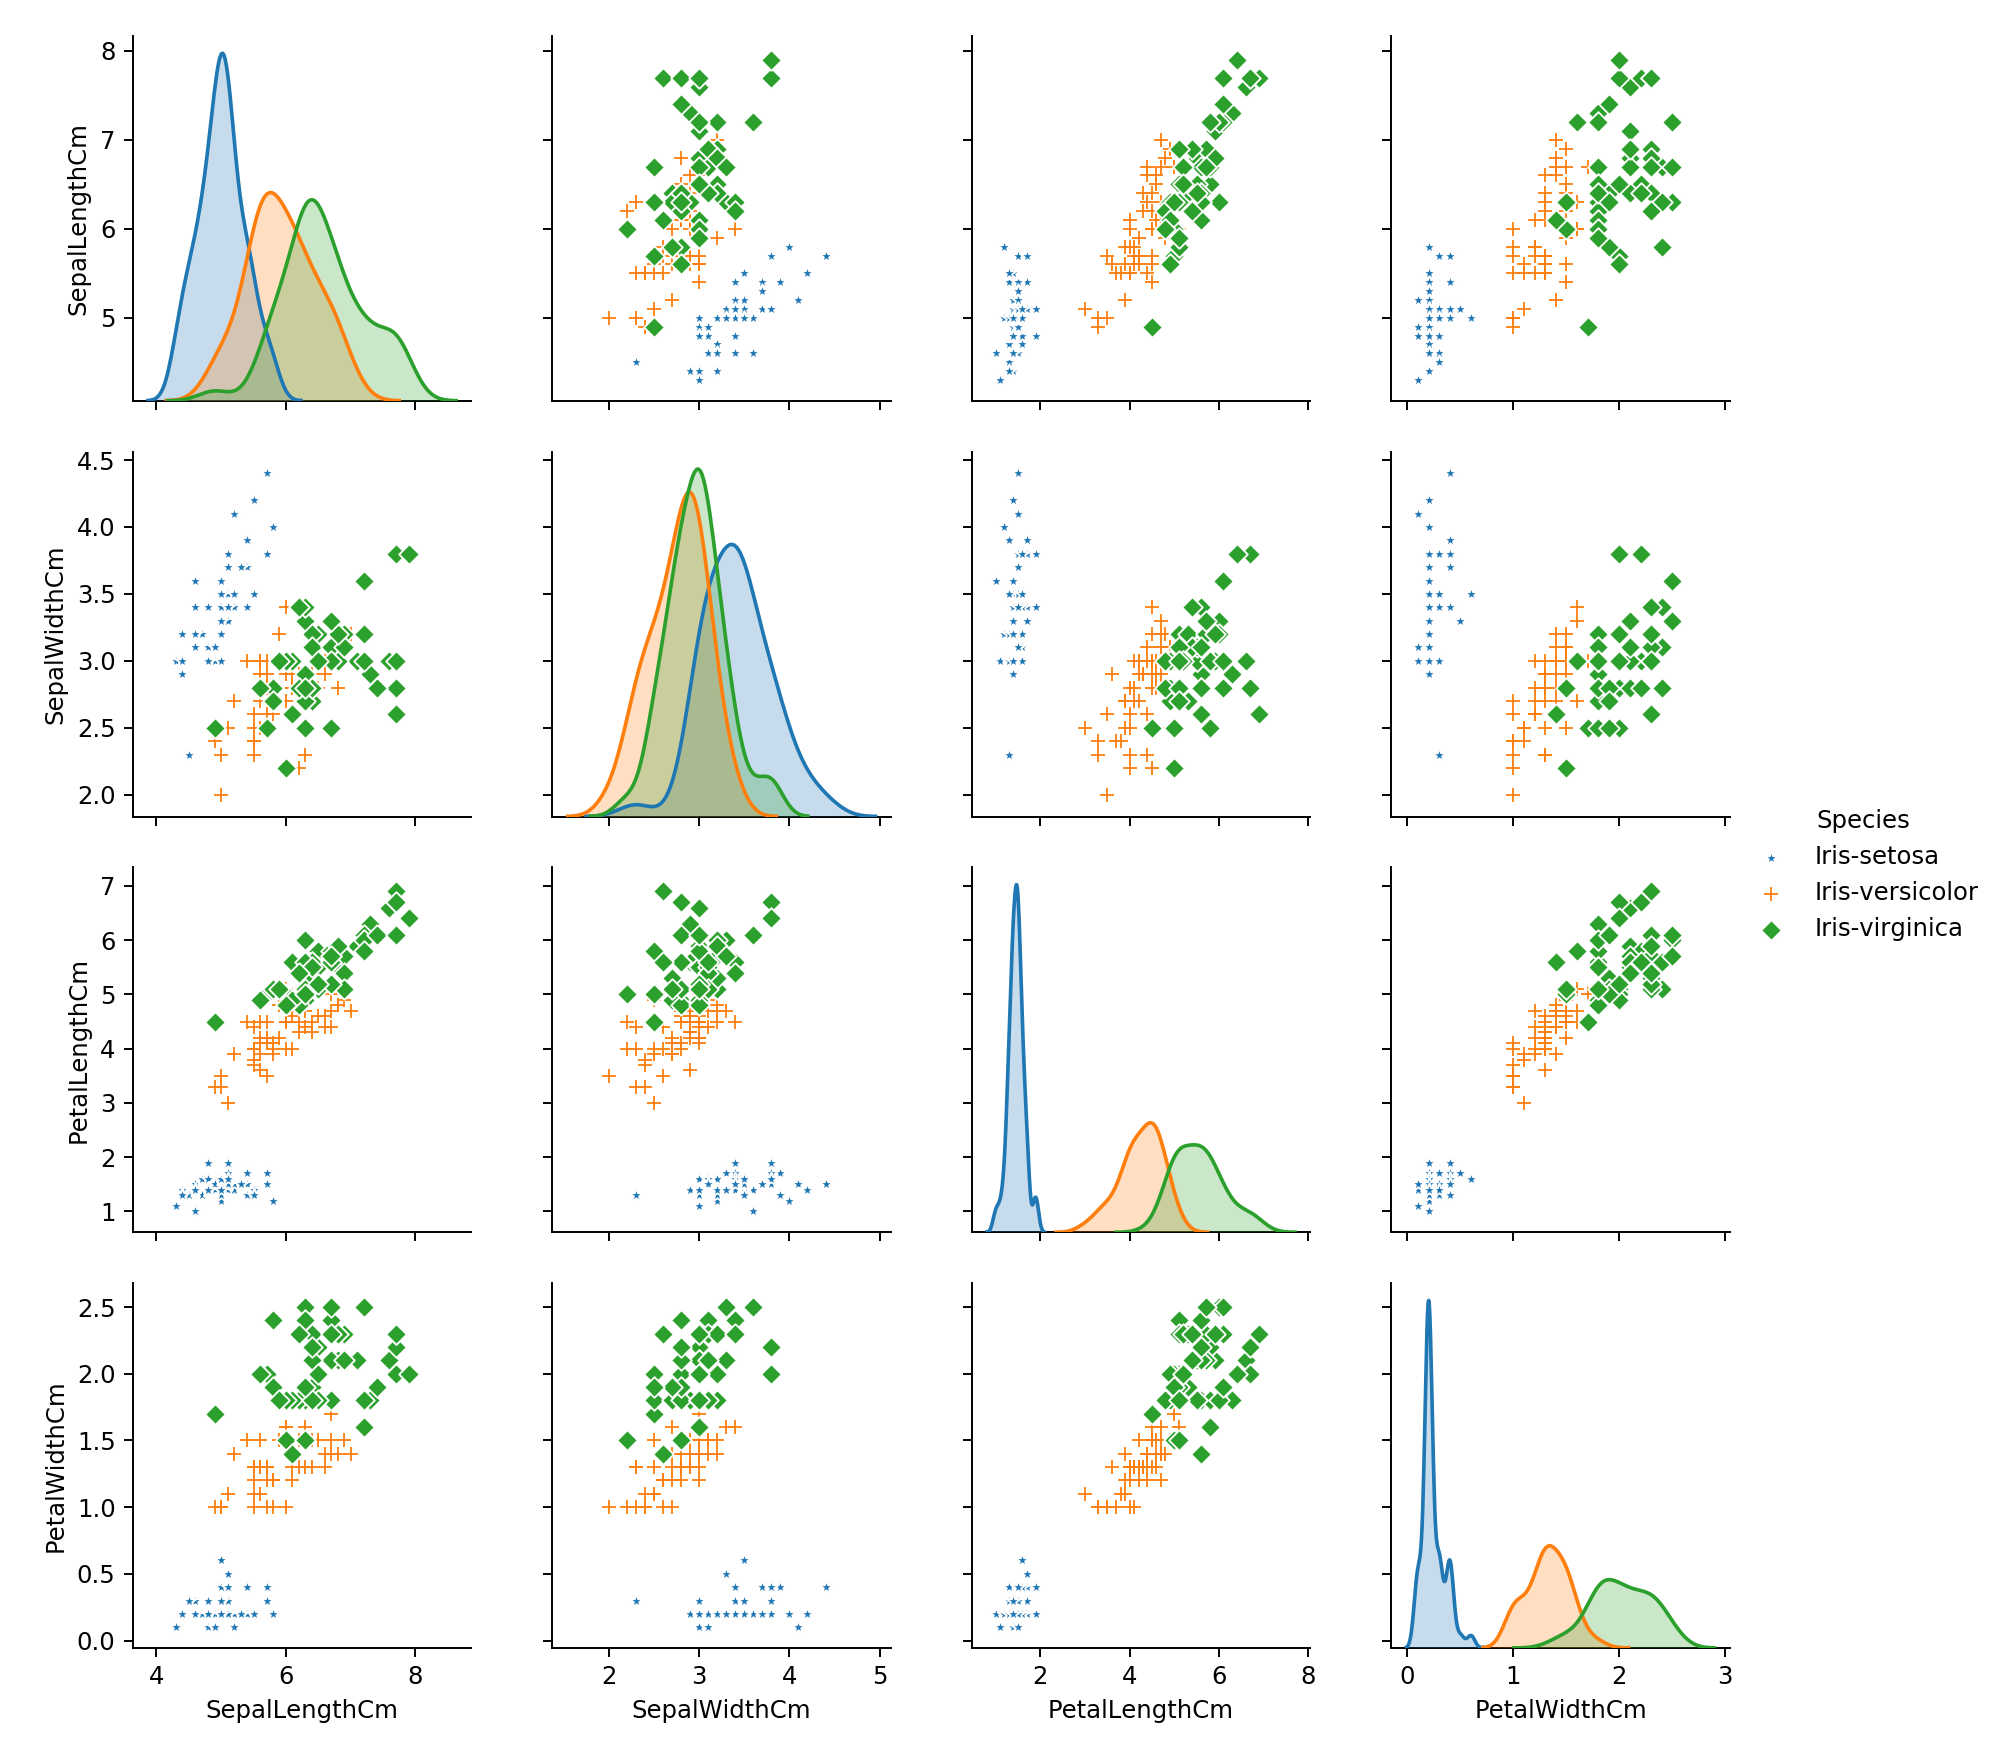

In [58]:
sns.pairplot(df,diag_kind = 'kde', hue = 'Species',markers=['*','+','D'])

<IPython.core.display.Javascript object>


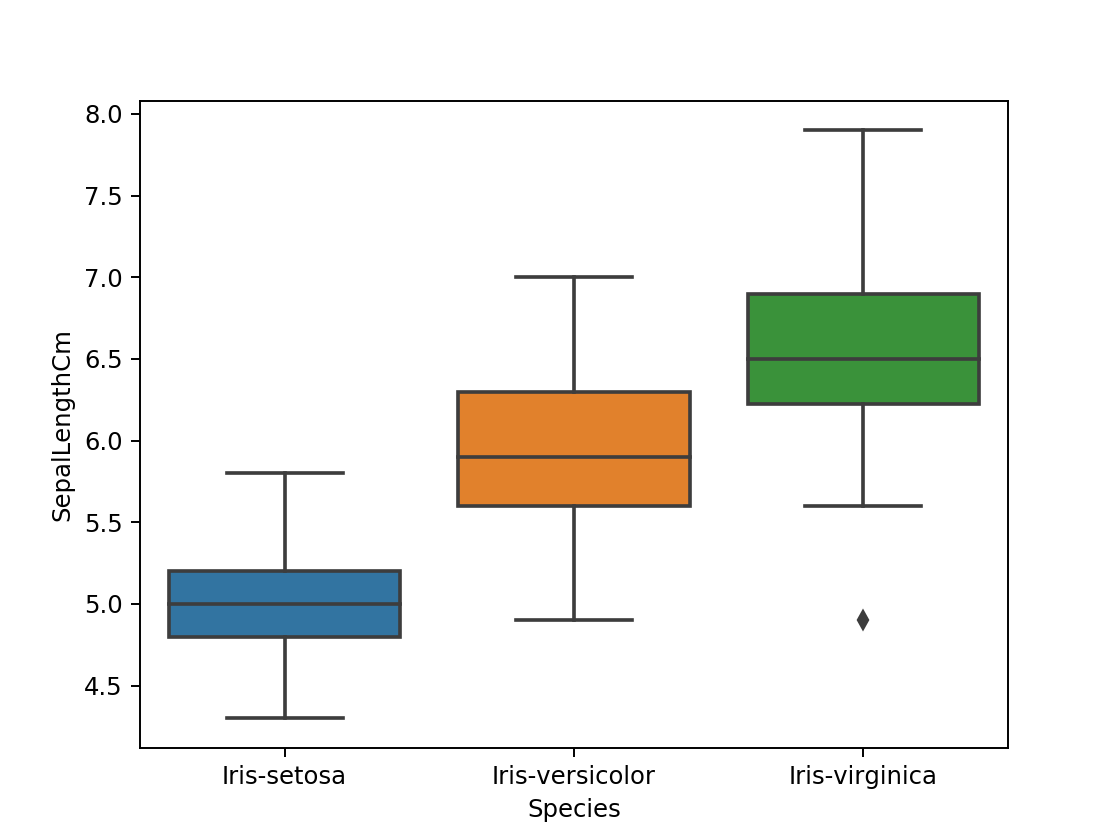

In [61]:
plt.figure()
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)

<IPython.core.display.Javascript object>


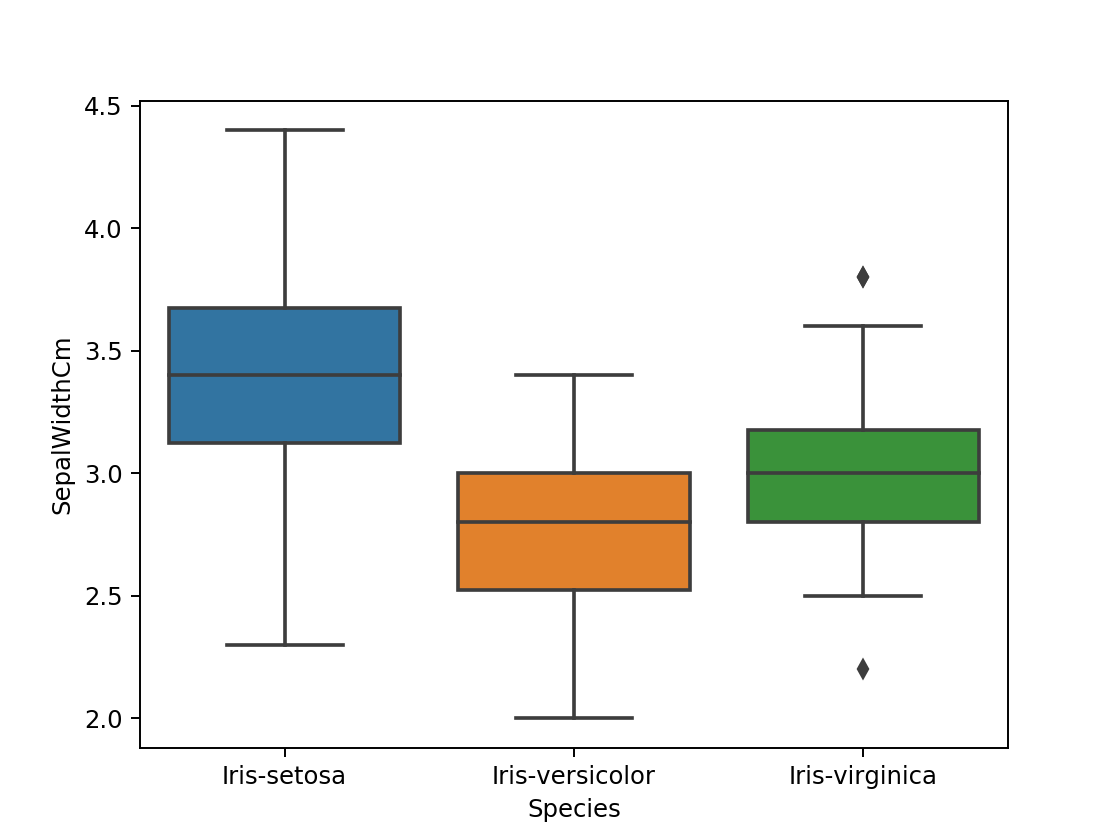

In [63]:
plt.figure()
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)

<IPython.core.display.Javascript object>


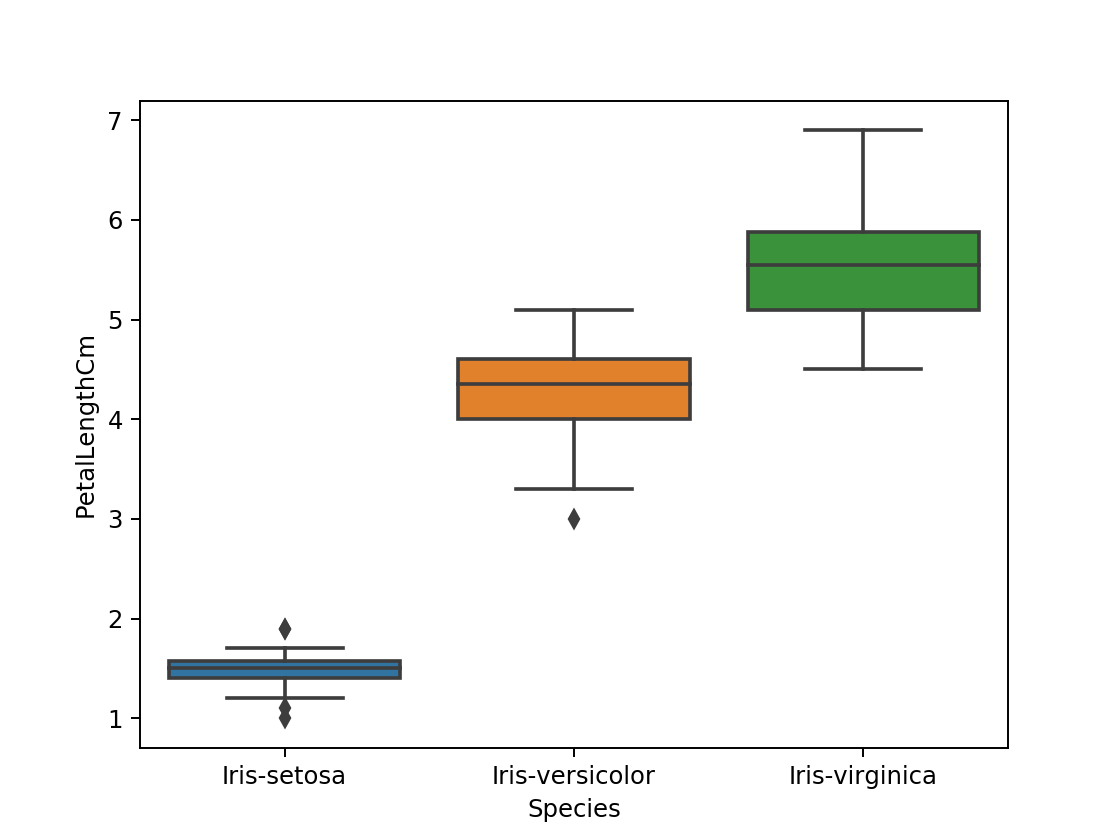

In [64]:
plt.figure()
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

<IPython.core.display.Javascript object>


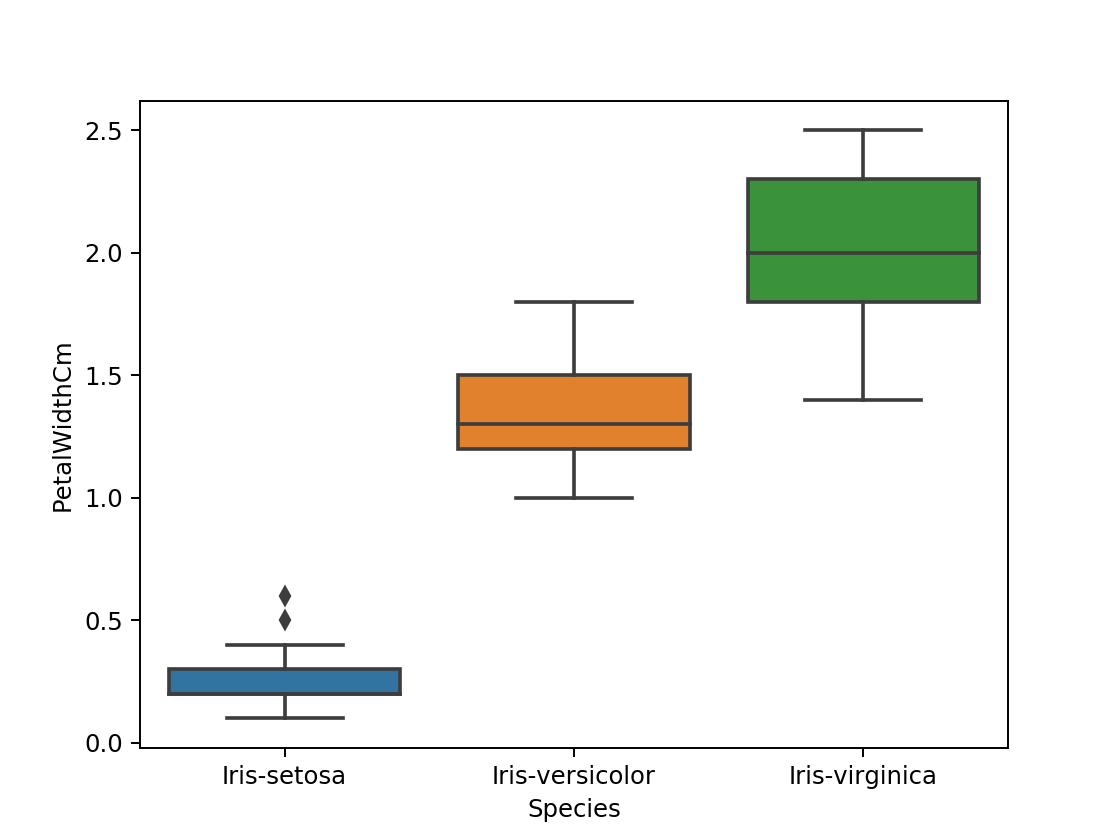

In [65]:
plt.figure()
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)

In [62]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<IPython.core.display.Javascript object>


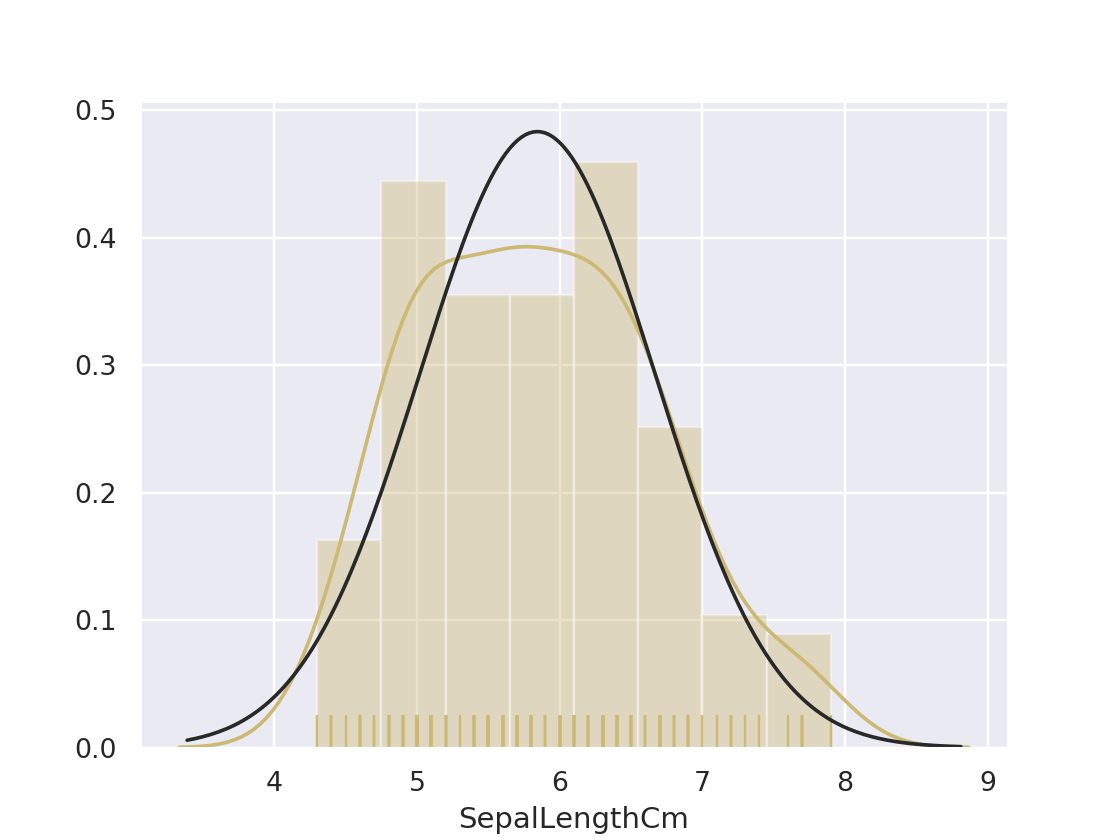

In [66]:
plt.figure()
sns.set()
from scipy.stats import norm
sns.set_color_codes()
sns.distplot(df['SepalLengthCm'],hist = True,rug = True,color = 'y',fit = norm)

<IPython.core.display.Javascript object>


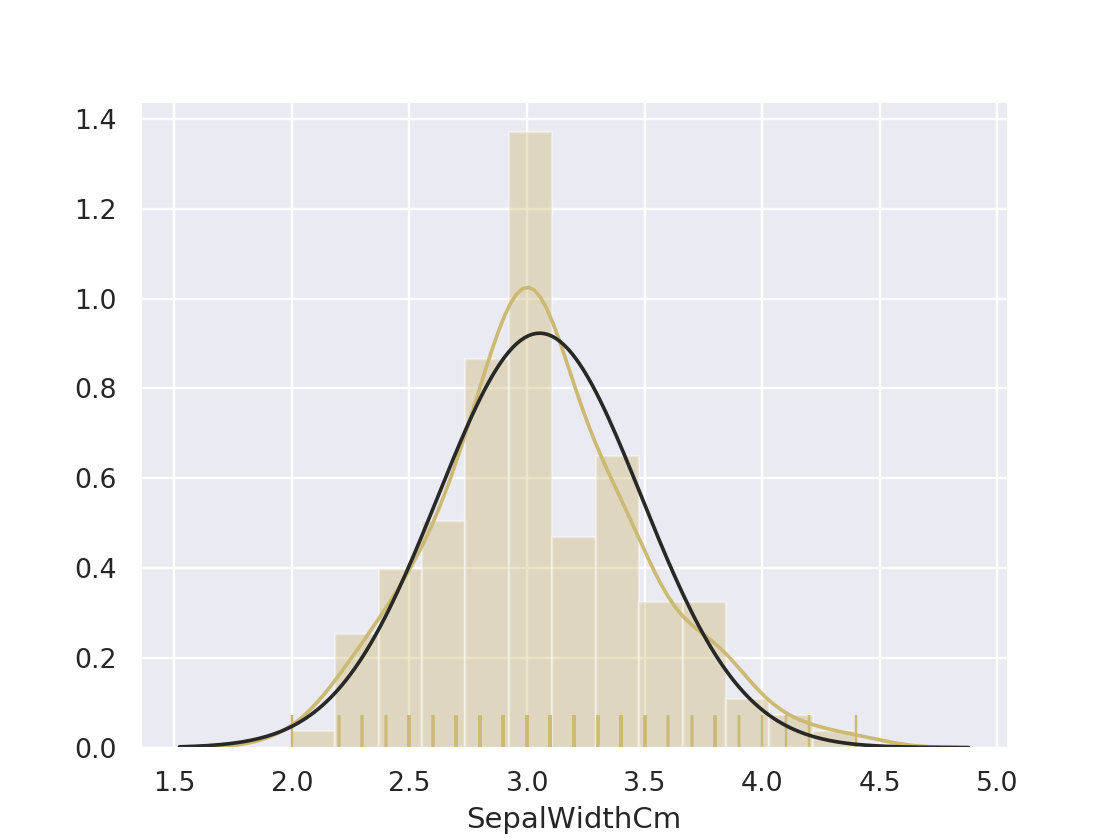

In [67]:
plt.figure()
sns.set()
from scipy.stats import norm
sns.set_color_codes()
sns.distplot(df['SepalWidthCm'],hist = True,rug = True,color = 'y',fit = norm)

<IPython.core.display.Javascript object>


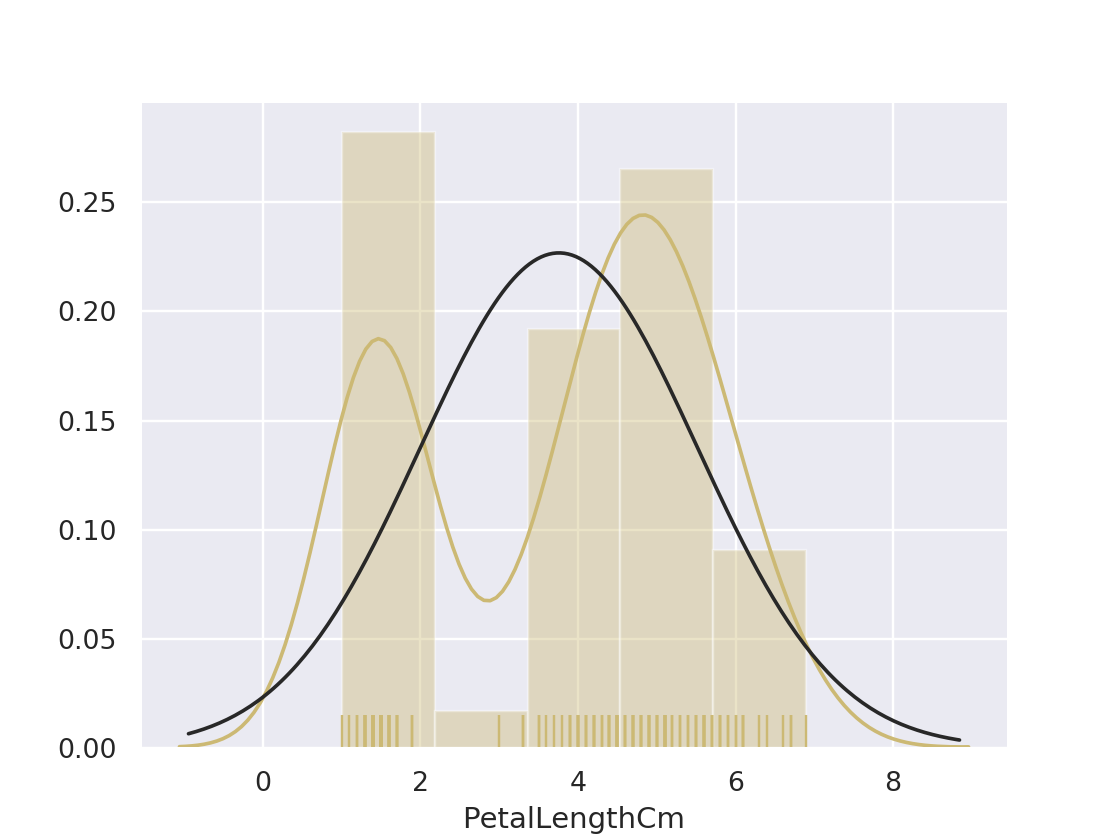

In [68]:
plt.figure()
sns.set()
from scipy.stats import norm
sns.set_color_codes()
sns.distplot(df['PetalLengthCm'],hist = True,rug = True,color = 'y',fit = norm)

<IPython.core.display.Javascript object>


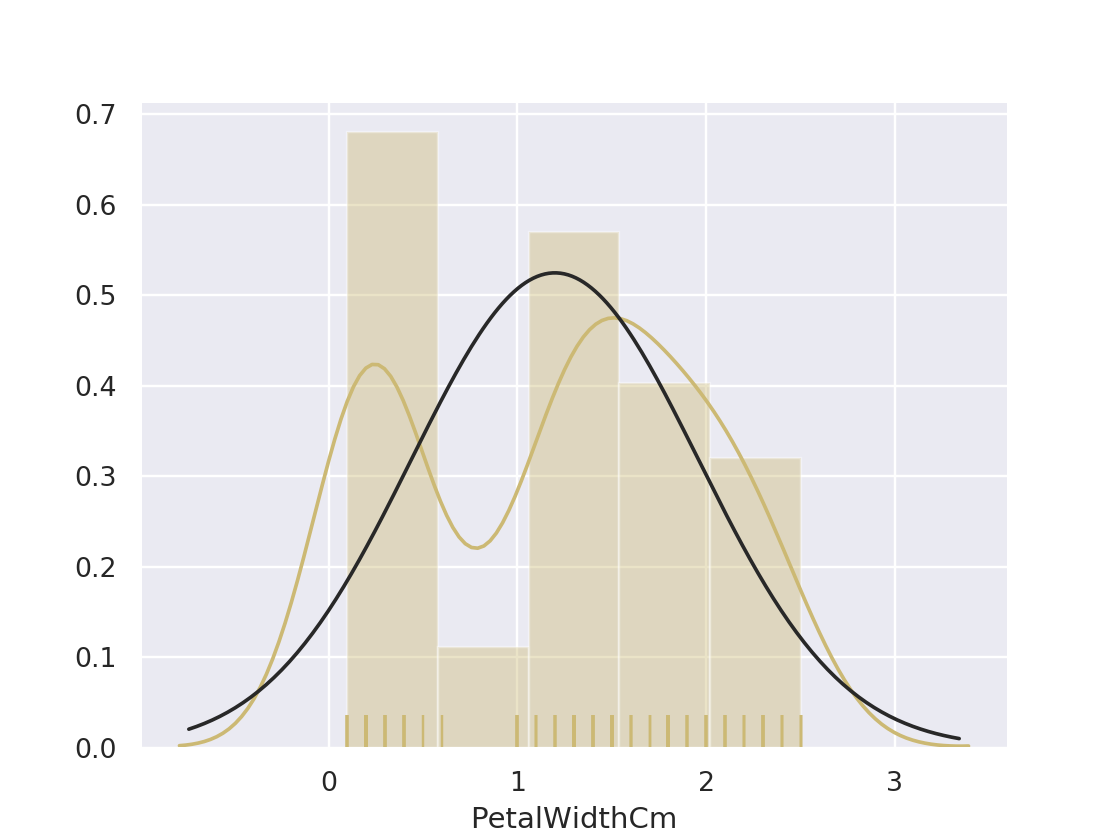

In [69]:
plt.figure()
sns.set()
from scipy.stats import norm
sns.set_color_codes()
sns.distplot(df['PetalWidthCm'],hist = True,rug = True,color = 'y',fit = norm)

In [70]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<IPython.core.display.Javascript object>


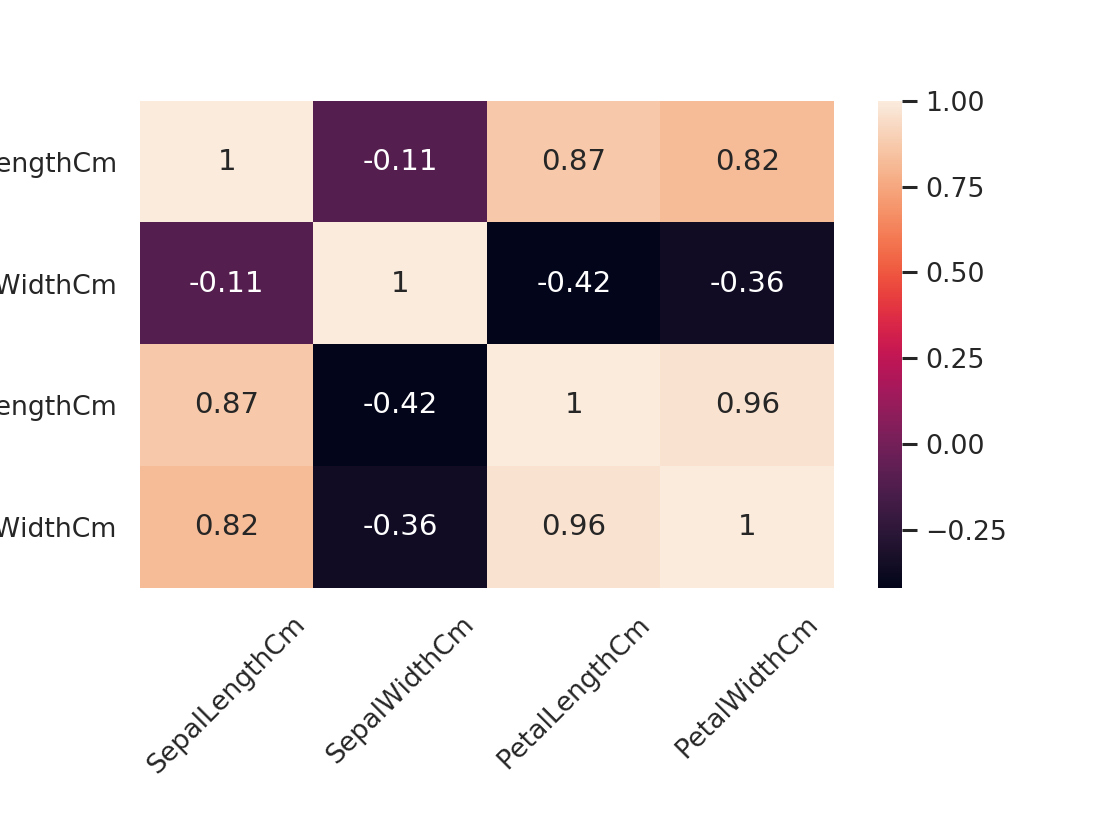

In [71]:
plt.figure()
sns.set()
sns.set_color_codes()
sns.heatmap(corr, annot = True)
ax = plt.gca().xaxis

for items in ax.get_ticklabels():
    items.set_rotation(45)

plt.subplots_adjust(bottom = 0.3)

### Predictive Analysis

In [72]:
del df['Species']

In [73]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df, y.values, test_size=0.15, random_state=0,shuffle = True)

In [76]:
norm.fit_transform(X_train)
norm.fit_transform(X_test)

array([[0.67767924, 0.32715549, 0.59589036, 0.28041899],
       [0.78892752, 0.28927343, 0.52595168, 0.13148792],
       [0.77867447, 0.59462414, 0.19820805, 0.02831544],
       [0.71366557, 0.28351098, 0.61590317, 0.17597233],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.65387747, 0.34250725, 0.62274045, 0.25947519],
       [0.80033301, 0.56023311, 0.20808658, 0.04801998],
       [0.75457341, 0.34913098, 0.52932761, 0.16893434],
       [0.76467269, 0.31486523, 0.53976896, 0.15743261],
       [0.77011854, 0.35349703, 0.50499576, 0.16412362],
       [0.69385414, 0.29574111, 0.63698085, 0.15924521],
       [0.74549757, 0.37274878, 0.52417798, 0.17472599],
       [0.73659895, 0.33811099, 0.56754345, 0.14490471],
       [0.7581754 , 0.32659863, 0.5365549 , 0.17496355],
       [0.73081412, 0.34743622, 0.56308629, 0.16772783],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.73350949, 0.35452959, 0.55013212, 0.18337737],
       [0.72337118, 0.34195729,

In [77]:
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (127, 4)
The shape of X_test is: (23, 4)
The shape of y_train is: (127,)
The shape of y_test is: (23,)


# Now let us define the Decision Tree Algorithm

In [78]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
 max_depth= 2,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.05
)
classifier.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [79]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

<IPython.core.display.Javascript object>


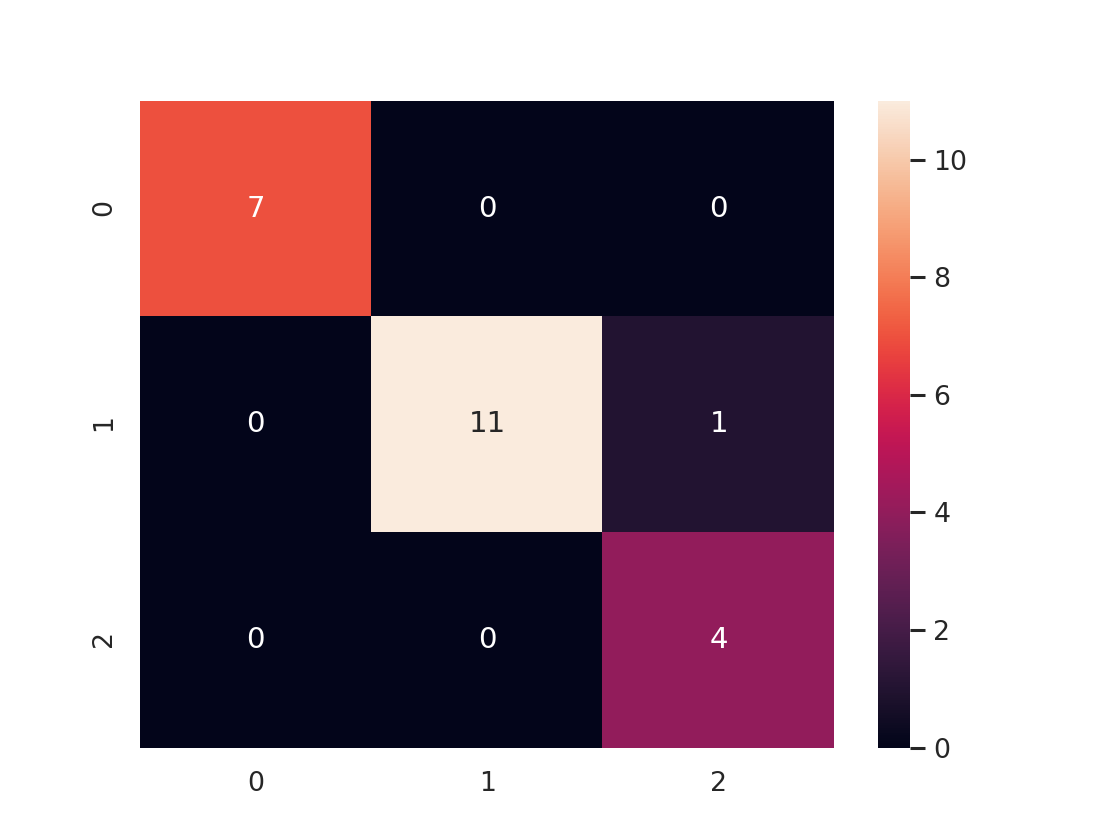

In [80]:
# Making the Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
plt.figure()
sns.heatmap(cm,annot  = True)

In [81]:
accuracy_score(y_pred, y_test)

0.9565217391304348

In [82]:
print(metrics.classification_report( y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.96        23
      macro avg       0.97      0.93      0.95        23
   weighted avg       0.96      0.96      0.96        23



<IPython.core.display.Javascript object>


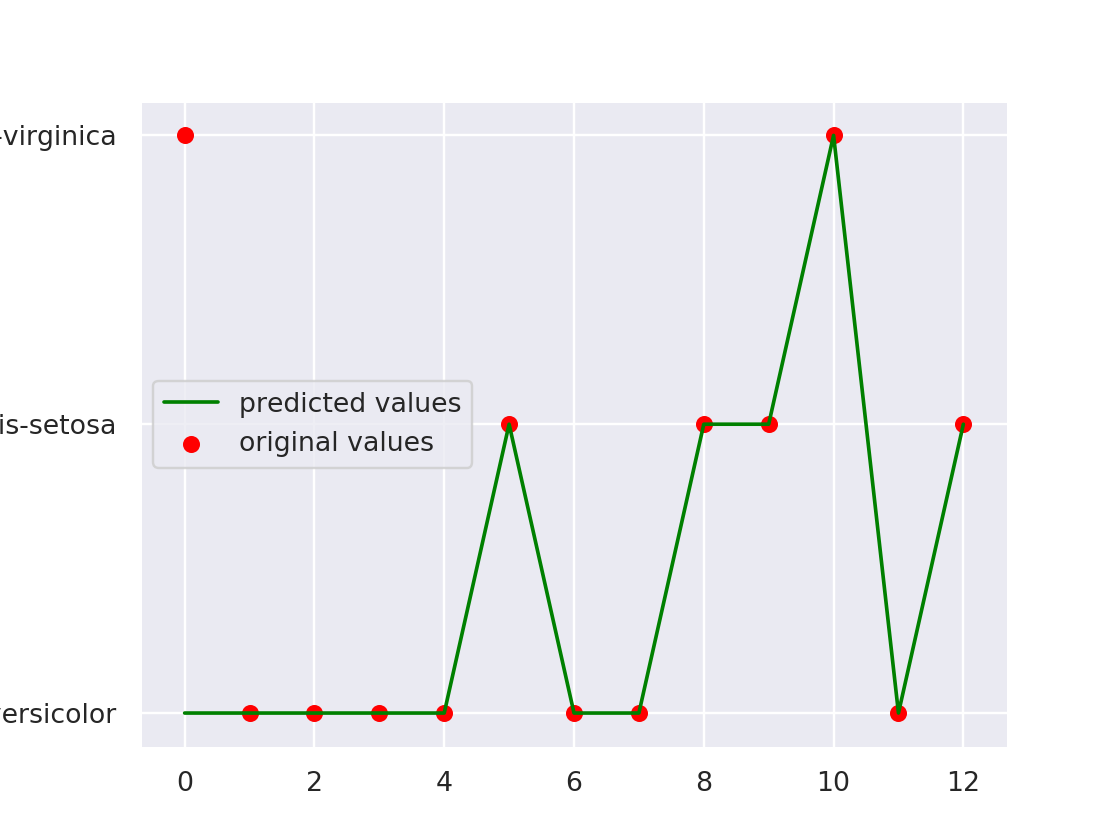

In [83]:
x = range(len(X_test[10:50]))
plt.figure()
plt.plot(x,classifier.predict(X_test[10:50]),color = 'green', label = 'predicted values' )
plt.scatter(x,y_test[10:50] , color = 'red', label = 'original values')
plt.grid(True)
plt.legend()

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
accuracies.std()


0.9525641025641025


0.05185576516963252

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion' : ["gini", "entropy"],'max_depth' : [1,2,3,4],'min_samples_split' : [1,2,3,4],'min_samples_leaf' : [.5,1,1.5,2,3],'min_weight_fraction_leaf' : [0.05,0.8,.1,.2,.3,.5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)


0.9525641025641025
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.05}


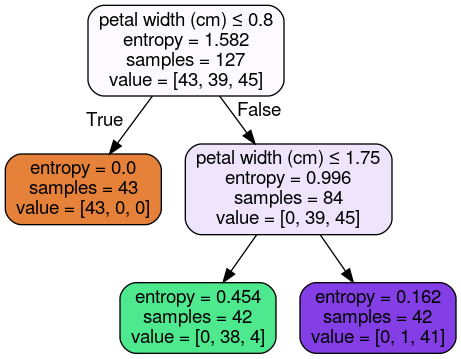

In [85]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
import pickle 
with open('model.pkl', 'wb') as fopen:
    pickle.dump(classifier, fopen)

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**